<a href="https://colab.research.google.com/github/thanit456/BayesianNetwork/blob/master/propablistic_model_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install --upgrade tensorflow-probability

Requirement already up-to-date: tensorflow-probability in /usr/local/lib/python3.6/dist-packages (0.10.0rc0)


In [0]:
import numpy as np
import tensorflow_probability as tfp
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [0]:
n = int(64)
scale_tril = np.array([[1.6180, 0.],
                       [-2.7183, 3.1415]]).astype(np.float32)
scale_noise = 0.01
x = tfp.distributions.Normal(loc=0, scale=1).sample([n, 2])                    
eps = tfp.distributions.Normal(loc=0, scale=scale_noise).sample([n, 2])
y = tfp.distributions.Bernoulli(logits=tf.reshape(
    tf.matmul(x, scale_tril) + eps,
    shape=[n, 2]
)).sample()

In [0]:
event_shape = y.shape[1:].as_list()
model = Sequential([
                    Dense(tfp.layers.IndependentBernoulli.params_size(event_shape)),
                    tfp.layers.IndependentBernoulli(event_shape),
])

In [0]:
model.compile(optimizer=Adam(learning_rate=0.5),
              loss=lambda y, model: -model.log_prob(y),
              metrics=[])

In [36]:
model.summary()

ValueError: ignored

In [37]:
batch_size=100
model.fit(x, y, 
          batch_size=batch_size,
          epochs=10,
          steps_per_epoch=n,
          shuffle=True)
print(model.get_weights())

Epoch 1/10
10/64 [===>..........................] - 0s 1ms/step - loss: 0.9410
[array([[ 3.7124248 , -0.25442135],
       [-3.7129006 ,  2.910537  ]], dtype=float32), array([-0.39979866,  0.35045594], dtype=float32)]


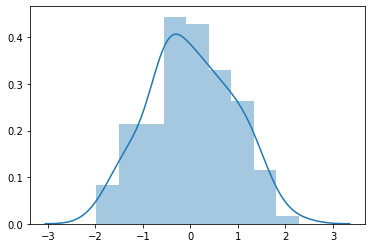

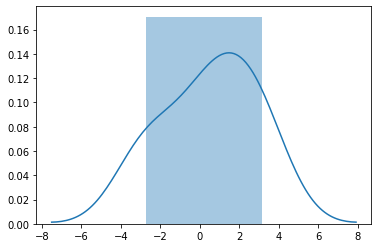

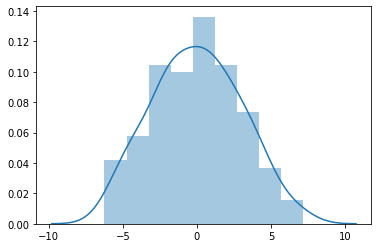

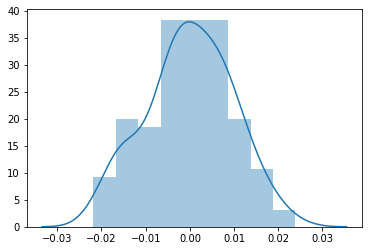

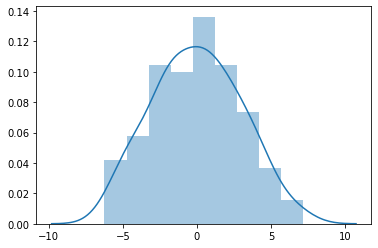

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(x)
plt.show()

sns.distplot(scale_tril)
plt.show()

sns.distplot(tf.matmul(x, scale_tril))
plt.show()

sns.distplot(eps)
plt.show()

sns.distplot(tf.matmul(x,scale_tril) + eps)
plt.show()


# y_pred = model.predict(x)


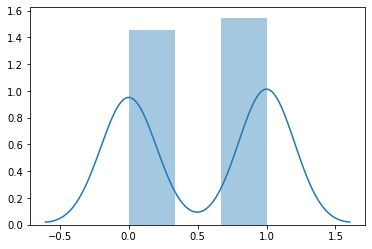

In [65]:
sns.distplot(y)

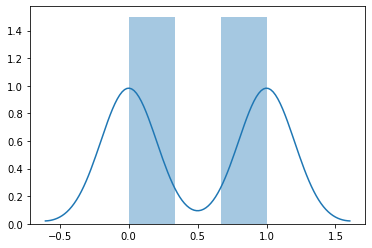

In [68]:
y_pred = model.predict(x)
sns.distplot(y_pred)